In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
overall = {}

for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
            if group != "4":
                if obj_num+"_"+group not in overall.keys():
                    overall[obj_num+"_"+group] = {}
                for folder in os.listdir("new_proposed/"+obj_num+"/"+group):
                    if folder not in overall[obj_num+"_"+group].keys():
                        overall[obj_num+"_"+group][folder] = []
                    if len(folder.split("_")) == 2 and folder.split("_")[1] == "two":
                        for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/"+folder+"/"):
                            if filename.split("_")[1][0] == "6":
                                with open("new_proposed/" + obj_num+"/"+group+"/"+folder+"/"+filename, 'r') as f:
                                    dic = json.load(f)
                                overall[obj_num+"_"+group][folder].append((dic['mean separation after push'] - dic['mean separation before push']))
                    else:
                        for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/"+folder+"/"):
                            with open("new_proposed/" + obj_num+"/"+group+"/"+folder+"/"+filename, 'r') as f:
                                dic = json.load(f)
                            overall[obj_num+"_"+group][folder].append((dic['mean separation after push'] - dic['mean separation before push']))
                            

In [3]:
for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
            if group != "4":
                optimal = {}
                for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/distribution_stable"):
                    try:
                        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                            continue
                        with open("new_proposed/"+obj_num+"/"+group+"/distribution_stable/"+filename, 'r') as f:
                            dic = json.load(f)
                        key = filename.split("_")[0]
                        if not key in optimal.keys():
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                    except:
                        continue
                optimal_final = [optimal[key][0] for key in optimal.keys()]
                overall[obj_num+"_"+group]["opt_mean"] = np.mean(optimal_final)

In [4]:
for obj_num in os.listdir("new_proposed/"):
    if os.path.isdir("new_proposed/"+obj_num):
        for group in os.listdir("new_proposed/"+obj_num):
            if group != "4":
                optimal = {}
                for filename in os.listdir("new_proposed/"+obj_num+"/"+group+"/distribution_stable_two"):
                    try:
                        if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
                            continue
                        with open("new_proposed/"+obj_num+"/"+group+"/distribution_stable_two/"+filename, 'r') as f:
                            dic = json.load(f)
                        key = filename.split("_")[0]
                        if not key in optimal.keys():
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                        elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
                            optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
                    except:
                        continue
                optimal_final = [optimal[key][0] for key in optimal.keys()]
                overall[obj_num+"_"+group]["opt_mean_two"] = np.mean(optimal_final)

In [5]:
single_point_heatmap = {}
for config in overall.keys():
    single_point_heatmap[config] = [np.mean(overall[config]["proposed9"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["proposed9"]), overall[config]["opt_mean"], np.mean(overall[config]["proposed9"])/overall[config]["opt_mean"])
    

7_0 5.512646478854053 6.985480706978917 0.7891577845668639
7_1 5.389212174315393 6.896972081232559 0.7813881382788324
7_3 4.825805749570462 7.018114496638011 0.6876214048491567
7_2 5.526439689214405 6.861460853802091 0.8054319345350603
6_0 4.909983951826442 5.641278356893727 0.8703672538736487
6_1 4.557972885179151 5.624432733749563 0.8103880161689746
6_3 4.3813074195949575 5.7154162795421755 0.7665771319715518
6_2 4.671627353714639 5.683385279985782 0.8219797046253261
4_0 2.921488256798169 3.1911694213804025 0.9154914299518521
4_1 2.884789894642469 3.2063731573458387 0.8997049791392437
4_3 2.6261950091266404 3.288415656044956 0.7986201514090887
4_2 2.860324634243182 3.1976060182270825 0.8945206563718857
3_0 1.9936224872986401 2.098649159807811 0.9499551070657332
3_1 2.0290350528495815 2.155044761628878 0.941528031796401
3_3 1.7624346410632814 2.302412247005089 0.765473100378008
3_2 1.9256972404111425 2.248602560515675 0.8563973350495161
5_0 3.9715823811760655 4.466222861790035 0.88924

In [6]:
cluster_point_heatmap = {}
for config in overall.keys():
    cluster_point_heatmap[config] = [np.mean(overall[config]["clusterDiffusion"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["clusterDiffusion"]), overall[config]["opt_mean"], np.mean(overall[config]["clusterDiffusion"])/overall[config]["opt_mean"])
    

7_0 4.3332461406971206 6.985480706978917 0.620321825005965
7_1 4.265705494760902 6.896972081232559 0.6184895986991696
7_3 3.9057722377148854 7.018114496638011 0.5565272894287951
7_2 4.306695814454106 6.861460853802091 0.6276645609757677
6_0 3.7846869884576075 5.641278356893727 0.6708917286154943
6_1 3.8178969134559866 5.624432733749563 0.6788056848020586
6_3 3.7264994553357216 5.7154162795421755 0.652008405524965
6_2 3.884449492279616 5.683385279985782 0.6834746020050454
4_0 2.6048280461223987 3.1911694213804025 0.8162612829862319
4_1 2.612840336192396 3.2063731573458387 0.8148896613004472
4_3 2.52954506992526 3.288415656044956 0.7692291165428872
4_2 2.639784006409596 3.1976060182270825 0.8255501119782194
3_0 2.0133636859891393 2.098649159807811 0.959361728748181
3_1 2.0147489197095987 2.155044761628878 0.93489887337039
3_3 1.8139051265095056 2.302412247005089 0.7878281262918839
3_2 1.9741675622003205 2.248602560515675 0.8779530882271974
5_0 3.2626570949867966 4.466222861790035 0.73051

In [7]:
diff = []
for config in overall.keys():
    if int(config.split("_")[0]) > 6:
        diff.append((single_point_heatmap[config][0] - cluster_point_heatmap[config][0])/cluster_point_heatmap[config][0])
np.mean(diff)

0.26358343273675927

In [8]:
area_point_heatmap = {}
for config in overall.keys():
    area_point_heatmap[config] = [np.mean(overall[config]["proposed9_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["proposed9_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])
    

7_0 [0.811146650318755, 1.0755584415417665]
7_1 [0.8352866024007521, 1.1464936700381463]
7_3 [0.7548402929659117, 1.040707955154919]
7_2 [0.8585022884687686, 1.212002423934706]
6_0 [0.8995203676447179, 1.2594052192664258]
6_1 [0.8418799993167679, 1.0581590964316454]
6_3 [0.8122163009998469, 1.0723705969880237]
6_2 [0.8835143398403524, 1.1757228359459448]
4_0 [0.9314662710658879, 1.0200178119004304]
4_1 [0.9231583134320202, 0.9490081984845183]
4_3 [0.8623998151730627, 0.9420296696508327]
4_2 [0.9224818079361209, 0.9626182585169418]
3_0 [0.9660530496405442, 0.9934330904168626]
3_1 [0.9601907980208649, 0.9475532478532254]
3_3 [0.8654719199692229, 0.9146806355229338]
3_2 [0.9185374860906158, 0.8846051975469641]
5_0 [0.9070458396625303, 1.1542950310285442]
5_1 [0.8965794498485068, 1.0943962445527928]
5_3 [0.844443970039213, 1.02834472879595]
5_2 [0.865342286590454, 0.9981907333785174]


In [9]:
cluster_area_point_heatmap = {}
for config in overall.keys():
    cluster_area_point_heatmap[config] = [np.mean(overall[config]["clusterDiffusion_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["clusterDiffusion_area"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_area"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])
    

7_0 [0.6239959456577436, 0.4721983850763564]
7_1 [0.6278837375839295, 0.5403866312979]
7_3 [0.6333454986312411, 0.7200226043076607]
7_2 [0.6621729570366611, 0.6696872261285043]
6_0 [0.678019494789143, 0.5450906009332002]
6_1 [0.687374302056665, 0.6065768542788065]
6_3 [0.7177245018660993, 0.8293804020247689]
6_2 [0.7081016907757149, 0.6870903855484216]
4_0 [0.8170658012389255, 0.6639972627228652]
4_1 [0.8273191389309447, 0.6711599362908011]
4_3 [0.8237854679779764, 0.8473476906197713]
4_2 [0.8607793783738718, 0.8000125359854703]
3_0 [0.9652821486736614, 0.9910077820915898]
3_1 [0.9403876182100623, 0.8902109824908983]
3_3 [0.8821509271437785, 0.9562805946319737]
3_2 [0.9145057085243402, 0.873802474224903]
5_0 [0.7365017674775629, 0.6106527250025038]
5_1 [0.75342526622278, 0.6688124023960103]
5_3 [0.7667371719363633, 0.8319568247129516]
5_2 [0.7647226769664368, 0.7264846481690439]


In [10]:
two_points_heatmap = {}
for config in overall.keys():
    two_points_heatmap[config] = [np.mean(overall[config]["proposed9_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["proposed9_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["proposed9_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])

7_0 [0.8144704689770447, 1.0862741875336344]
7_1 [0.8205921134397818, 1.1035509980658902]
7_3 [0.7719846073009271, 1.0859603504338102]
7_2 [0.8710747969873079, 1.246731123892153]
6_0 [0.8905089154891461, 1.2303443314958733]
6_1 [0.8354471008538872, 1.0393573126597575]
6_3 [0.8131801909619913, 1.0748492862708163]
6_2 [0.8797506435136077, 1.1652386196223443]
4_0 [0.9198436457365833, 0.9838475631341193]
4_1 [0.9169743445781581, 0.9310801955728658]
4_3 [0.8617104773400976, 0.9403394204303455]
4_2 [0.9191764914979388, 0.9539076879374878]
3_0 [0.9646352416277343, 0.9889725673084134]
3_1 [0.9659306527271089, 0.9641736227046973]
3_3 [0.897648743039076, 0.994934484565382]
3_2 [0.9345441706432439, 0.927493422823063]
5_0 [0.9002239912577865, 1.13254906618438]
5_1 [0.8987052174116673, 1.1007159503703148]
5_3 [0.8646123175663312, 1.0793160671649027]
5_2 [0.8650662992782494, 0.9974454767387154]


In [11]:
cluster_two_points_heatmap = {}
for config in overall.keys():
    cluster_two_points_heatmap[config] = [np.mean(overall[config]["clusterDiffusion_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["clusterDiffusion_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["clusterDiffusion_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])

7_0 [0.6153123637107808, 0.4442031578965734]
7_1 [0.6247430601418903, 0.5312084229558218]
7_3 [0.6569444829793571, 0.7823120926495898]
7_2 [0.6655220460773217, 0.6789383241295408]
6_0 [0.6714103874805815, 0.5237769965948699]
6_1 [0.6822373705691294, 0.5915628639854795]
6_3 [0.7413477720342775, 0.8901287746503161]
6_2 [0.706454379046784, 0.6825016060563595]
4_0 [0.8138758730189486, 0.6540700307942642]
4_1 [0.8248186450396251, 0.6639107306716382]
4_3 [0.8567143036258997, 0.9280888542754054]
4_2 [0.8659410559331479, 0.8136152144367915]
3_0 [0.9621005562778682, 0.9809982700315072]
3_1 [0.9393832333920651, 0.8873026767889993]
3_3 [0.9048593513162234, 1.0129188289775743]
3_2 [0.9135244536425715, 0.8711733051246936]
5_0 [0.7310576704451566, 0.5932986098637676]
5_1 [0.7462176406638267, 0.6473848136206339]
5_3 [0.7881554802035936, 0.8860871810305242]
5_2 [0.7644321857061265, 0.7257002260924585]


In [12]:
groups = ["disk", "semi-disk", "semi-slice", "slice"]
num_objs = ["3 objects", "4 objects", "5 objects", "6 objects", "7 objects"]



In [24]:
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = None
#     cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
#     cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
#     ax.tick_params(top=True, bottom=False,
#                    labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


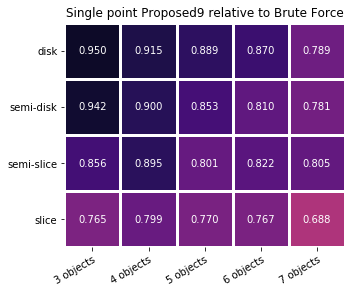

In [14]:
values = np.zeros([4, 5])
for config in single_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = single_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Single point Proposed9 relative to Brute Force")
plt.show()

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


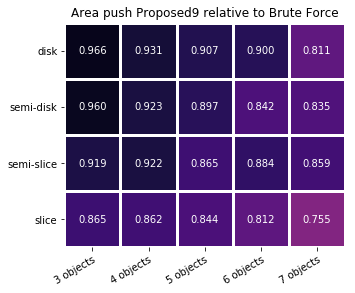

In [15]:
values = np.zeros([4, 5])
for config in area_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = area_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Area push Proposed9 relative to Brute Force")
plt.show()

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


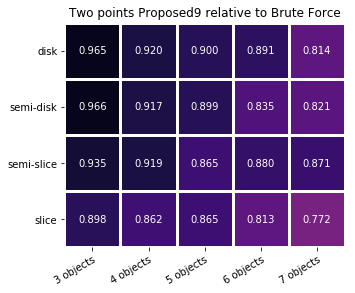

In [16]:
values = np.zeros([4, 5])
for config in two_points_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = two_points_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Two points Proposed9 relative to Brute Force")
plt.show()

In [17]:
random_heatmap = {}
for config in overall.keys():
    random_heatmap[config] = [np.mean(overall[config]["distribution_stable"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, [np.mean(overall[config]["distribution_stable"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])])
    

7_0 [0.4775290730832944, 0.0]
7_1 [0.442969641102155, 0.0]
7_3 [0.36055786428638725, 0.0]
7_2 [0.41973231383452014, 0.0]
6_0 [0.5089930731070522, 0.0]
6_1 [0.47983828521642086, 0.0]
6_3 [0.3952026553963585, 0.0]
6_2 [0.461445242605234, 0.0]
4_0 [0.603702839480707, 0.0]
4_1 [0.5958135907427101, 0.0]
4_3 [0.47820990803100405, 0.0]
4_2 [0.5572063159866862, 0.0]
3_0 [0.6502834949182558, 0.0]
3_1 [0.6329528134560719, 0.0]
3_3 [0.4987416344339441, 0.0]
3_2 [0.5883863488123738, 0.0]
5_0 [0.5449360978113291, 0.0]
5_1 [0.5284559793754408, 0.0]
5_3 [0.437548359060519, 0.0]
5_2 [0.4956871062678461, 0.0]


/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


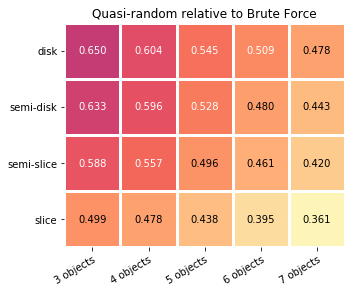

In [18]:
values = np.zeros([4, 5])
for config in random_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = random_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Quasi-random relative to Brute Force")
plt.show()

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


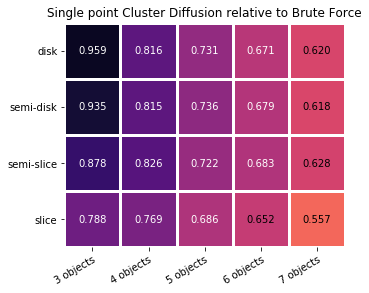

In [19]:
values = np.zeros([4, 5])
for config in single_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = cluster_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Single point Cluster Diffusion relative to Brute Force")
plt.show()

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


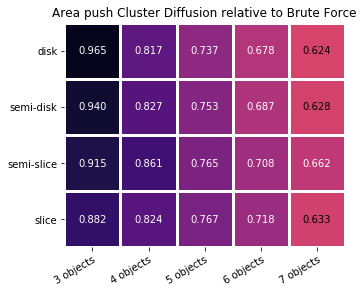

In [20]:
values = np.zeros([4, 5])
for config in area_point_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = cluster_area_point_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Area push Cluster Diffusion relative to Brute Force")
plt.show()

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


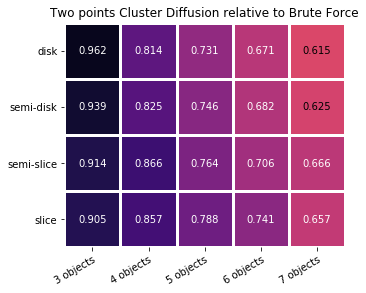

In [21]:
values = np.zeros([4, 5])
for config in two_points_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = cluster_two_points_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Two points Cluster Diffusion relative to Brute Force")
plt.show()

In [29]:
two_point_bruteforce_heatmap = {}
for config in overall.keys():
    two_point_bruteforce_heatmap[config] = [np.mean(overall[config]["distribution_stable_two"])/overall[config]["opt_mean"], (np.mean(overall[config]["distribution_stable_two"]) - np.mean(overall[config]["distribution_stable"]))/np.std(overall[config]["distribution_stable"])]
    print(config, np.mean(overall[config]["distribution_stable_two"]), overall[config]["opt_mean"], np.mean(overall[config]["distribution_stable_two"])/overall[config]["opt_mean"])
    

7_0 3.3964880090514 6.985480706978917 0.4862210850654992
7_1 3.190312265497374 6.896972081232559 0.46256708421055875
7_3 3.1639315722504513 7.018114496638011 0.4508235899779229
7_2 3.174958399081948 6.861460853802091 0.462723385986037
6_0 2.91143028220031 5.641278356893727 0.5160940655662734
6_1 2.8014443282909975 5.624432733749563 0.49808477777338395
6_3 2.7930448428503967 5.7154162795421755 0.488686161469612
6_2 2.8824749344977585 5.683385279985782 0.507175704706926
4_0 1.9348168175875935 3.1911694213804025 0.6063033835259837
4_1 1.9608223316330098 3.2063731573458387 0.6115390303654279
4_3 1.9060944942623343 3.288415656044956 0.5796391617216763
4_2 1.920224195739549 3.1976060182270825 0.6005193212652946
3_0 1.356401794114928 2.098649159807811 0.6463213671403485
3_1 1.383804614067713 2.155044761628878 0.6421233742828489
3_3 1.388469015438881 2.302412247005089 0.6030497002632613
3_2 1.4237041933269192 2.248602560515675 0.6331506591366769
5_0 2.463380174927307 4.466222861790035 0.551557

/Users/Xenon/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:108: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


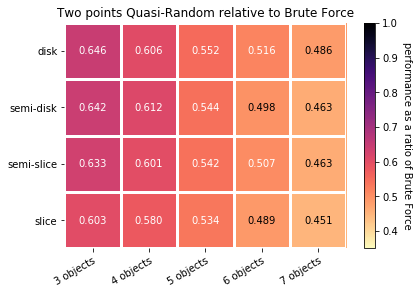

In [31]:
values = np.zeros([4, 5])
for config in two_point_bruteforce_heatmap.keys():
    g = config.split("_")[1]
    n = config.split("_")[0]
    values[int(g)][int(n) - 3] = two_point_bruteforce_heatmap[config][0]

fig, ax = plt.subplots()

im, cbar = heatmap(values, groups, num_objs, ax=ax,
                   cmap="magma_r", cbarlabel="performance as a ratio of Brute Force",vmin=0.35, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.3f}")

fig.tight_layout()
plt.title("Two points Quasi-Random relative to Brute Force")
plt.show()